<a href="https://colab.research.google.com/github/MizanMustakim/Big_data_movie_project/blob/main/Big_data_movie_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import seaborn as sns
import numpy as np

# **Dataset Work**

## **Dataset download**
> Dataset link: https://grouplens.org/datasets/movielens/1m/

In [4]:
!wget --no-check-certificate \
https://files.grouplens.org/datasets/movielens/ml-1m.zip

--2022-01-05 09:32:07--  https://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip.2’

ml-1m.zip.2         100%[===================>]   5.64M  20.6MB/s    in 0.3s    

2022-01-05 09:32:08 (20.6 MB/s) - ‘ml-1m.zip.2’ saved [5917549/5917549]



Extracting the downloaded zip file

In [5]:
local_zip = "/content/ml-1m.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/movie_data')
zip_ref.close()

## **Data Preprocessing**

In [6]:
# Define file directories
MOVIELENS_DIR = '/content/movie_data/ml-1m'
USER_DATA_FILE = '/content/movie_data/ml-1m/users.dat'
MOVIE_DATA_FILE = '/content/movie_data/ml-1m/movies.dat'
RATING_DATA_FILE = '/content/movie_data/ml-1m/ratings.dat'

In [7]:
# Specify User's Age and Occupation Column
AGES = { 1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+" }
OCCUPATIONS = { 0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin",
                4: "college/grad student", 5: "customer service", 6: "doctor/health care",
                7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer",
                12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed",
                17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer" }

In [8]:
# Define csv files to be saved into
USERS_CSV_FILE = 'users.csv'
MOVIES_CSV_FILE = 'movies.csv'
RATINGS_CSV_FILE = 'ratings.csv'

In [9]:
# Read the Ratings File
ratings = pd.read_csv(os.path.join(MOVIELENS_DIR, RATING_DATA_FILE), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Set max_userid to the maximum user_id in the ratings
max_userid = ratings['user_id'].drop_duplicates().max()
# Set max_movieid to the maximum movie_id in the ratings
max_movieid = ratings['movie_id'].drop_duplicates().max()

# Process ratings dataframe for Keras Deep Learning model
# Add user_emb_id column whose values == user_id - 1
ratings['user_emb_id'] = ratings['user_id'] - 1
# Add movie_emb_id column whose values == movie_id - 1
ratings['movie_emb_id'] = ratings['movie_id'] - 1

print(len(ratings), 'ratings loaded')

1000209 ratings loaded


In [10]:
# Save into ratings.csv
ratings.to_csv(RATINGS_CSV_FILE, 
               sep='\t', 
               header=True, 
               encoding='latin-1', 
               columns=['user_id', 'movie_id', 'rating', 'timestamp', 'user_emb_id', 'movie_emb_id'])
print('Saved to', RATINGS_CSV_FILE)

Saved to ratings.csv


In [11]:
# Read the Users File
users = pd.read_csv(os.path.join(MOVIELENS_DIR, USER_DATA_FILE), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
users['age_desc'] = users['age'].apply(lambda x: AGES[x])
users['occ_desc'] = users['occupation'].apply(lambda x: OCCUPATIONS[x])
print(len(users), 'descriptions of', max_userid, 'users loaded.')

6040 descriptions of 6040 users loaded.


In [12]:
# Save into users.csv
users.to_csv(USERS_CSV_FILE, 
             sep='\t', 
             header=True, 
             encoding='latin-1',
             columns=['user_id', 'gender', 'age', 'occupation', 'zipcode', 'age_desc', 'occ_desc'])
print('Saved to', USERS_CSV_FILE)

Saved to users.csv


In [13]:
# Read the Movies File
movies = pd.read_csv(os.path.join(MOVIELENS_DIR, MOVIE_DATA_FILE), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['movie_id', 'title', 'genres'])
print(len(movies), 'descriptions of', max_movieid, 'movies loaded.')

3883 descriptions of 3952 movies loaded.


In [14]:
# Save into movies.csv
movies.to_csv(MOVIES_CSV_FILE, 
              sep='\t', 
              header=True, 
              columns=['movie_id', 'title', 'genres'])
print('Saved to', MOVIES_CSV_FILE)

Saved to movies.csv


In [15]:
movie_df = pd.read_csv("/content/movies.csv", sep="\t")
movie_df = movie_df.drop(["Unnamed: 0"], axis=1)

rating_df = pd.read_csv("/content/ratings.csv", sep="\t")
rating_df = rating_df.drop(["Unnamed: 0"], axis=1)

user_df = pd.read_csv("/content/users.csv", sep="\t")
user_df = user_df.drop(["Unnamed: 0"], axis=1)

Checking NAN values in all dataframes

In [16]:
movie_df.isna().sum()

movie_id    0
title       0
genres      0
dtype: int64

In [17]:
rating_df.isna().sum()

user_id         0
movie_id        0
rating          0
timestamp       0
user_emb_id     0
movie_emb_id    0
dtype: int64

In [18]:
user_df.isna().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
age_desc      0
occ_desc      0
dtype: int64

**Movies**

In [19]:
movie_df.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
movie_df.shape

(3883, 3)

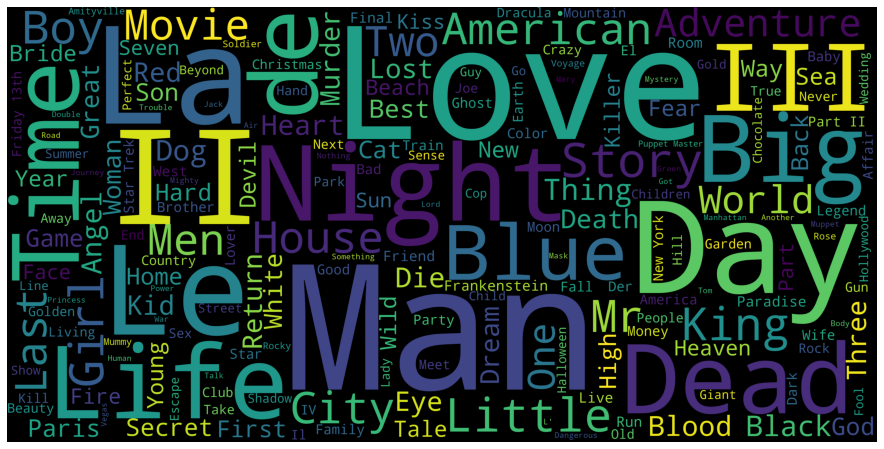

In [21]:
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movie_df['title'] = movie_df['title'].fillna("").astype('str')
title_corpus = ' '.join(movie_df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

**Ratings**

In [22]:
rating_df.head()

,user_id,movie_id,rating,timestamp,user_emb_id,movie_emb_id
0,1,1193,5,978300760,0,1192
1,1,661,3,978302109,0,660
2,1,914,3,978301968,0,913
3,1,3408,4,978300275,0,3407
4,1,2355,5,978824291,0,2354


In [23]:
# Fill NaN values in user_id and movie_id column with 0
rating_df['user_id'] = rating_df['user_id'].fillna(0)
rating_df['movie_id'] = rating_df['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
rating_df['rating'] = rating_df['rating'].fillna(rating_df['rating'].mean())

In [24]:
# Get summary statistics of rating
rating_df['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

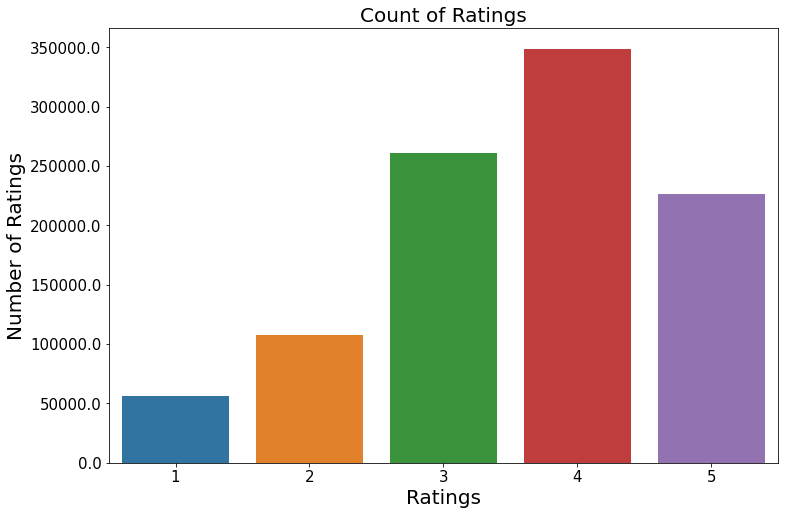

In [25]:
plt.figure(figsize=(12,8))

# Display distribution of rating
ax = sns.countplot(x = rating_df['rating'].fillna(rating_df['rating'].median()), data= rating_df)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count of Ratings", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

**Genres**
>The genres variable will surely be important while building the recommendation engines since it describes the content of the film (i.e. Animation, Horror, Sci-Fi). A basic assumption is that films in the same genre should have similar contents. I'll attempt to see exactly which genres are the most popular.

In [26]:
# Make a census of the genre keywords
genre_labels = set()
for s in movie_df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movie_df, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

The top 5 genres are, in that respect order: Drama, Comedy, Thriller, Action and Romance. I'll show this on a wordcloud too in order to make it more visually appealing.

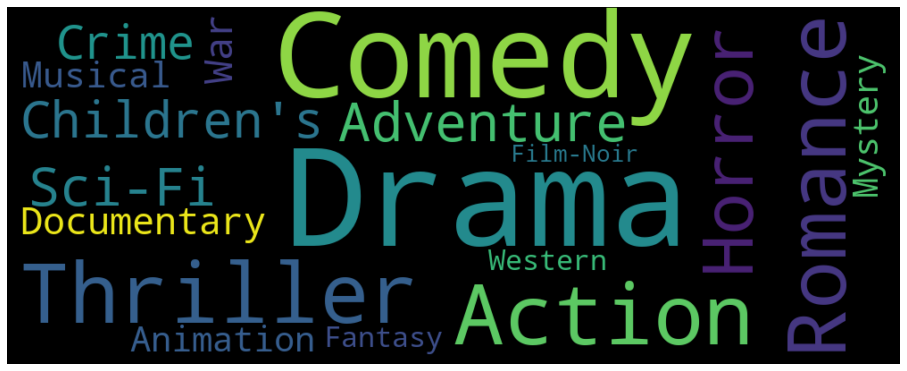

In [27]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='black')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

***Merging the datasets***

In [28]:
# Join all 2 files into one dataframe
dataset = pd.merge(pd.merge(movie_df, rating_df), user_df)

In [29]:
dataset.head()

,movie_id,title,genres,user_id,rating,timestamp,user_emb_id,movie_emb_id,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,0,0,F,1,10,48067,Under 18,K-12 student
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,0,47,F,1,10,48067,Under 18,K-12 student
2,150,Apollo 13 (1995),Drama,1,5,978301777,0,149,F,1,10,48067,Under 18,K-12 student
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,0,259,F,1,10,48067,Under 18,K-12 student
4,527,Schindler's List (1993),Drama|War,1,5,978824195,0,526,F,1,10,48067,Under 18,K-12 student


# Simple Recommenders
> This recommenders offer generalized recommendations to every user, based on movie popularity and/or genre. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. An example could be IMDB Top 250.

***Preprocessing*** for making this model

In [30]:
df_1 = dataset[["title", "genres", "rating"]]
df_1.head()

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
1,Pocahontas (1995),Animation|Children's|Musical|Romance,5
2,Apollo 13 (1995),Drama,5
3,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4
4,Schindler's List (1993),Drama|War,5


In [31]:
df_1 = df_1.groupby(["title"]).agg(**{"avg_rating":("rating", "mean"), "rate_count": ("rating", "count")}).reset_index()
df_1.head()

,title,avg_rating,rate_count
0,"$1,000,000 Duck (1971)",3.027027,37
1,'Night Mother (1986),3.371429,70
2,'Til There Was You (1997),2.692308,52
3,"'burbs, The (1989)",2.910891,303
4,...And Justice for All (1979),3.713568,199


In [32]:
df_1.shape

(3706, 3)

In [33]:
# Calculate mean of vote average column
C = df_1['avg_rating'].mean()
print(C)

3.2388921779108975


In [34]:
# Calculate the minimum number of votes required to be in the chart, m
m = df_1['rate_count'].quantile(0.90)
print(m)

729.5


In [35]:
# Filter out all qualified movies into a new DataFrame
q_movies = df_1.copy().loc[df_1['rate_count'] >= m]
q_movies.shape

(371, 3)

*WeightedRating (WR)* = ($\frac{v}{v + m}$ $.$ ${R}$ ) + ($\frac{m}{v+m}$ $.$ ${C}$ )

In the above equation,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie;
* C is the mean vote across the whole report.

In [36]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['rate_count']
    R = x['avg_rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [37]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [38]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'rate_count', 'avg_rating', 'score']].head(5)

,title,rate_count,avg_rating,score
2970,"Shawshank Redemption, The (1994)",2227,4.554558,4.229925
3153,Star Wars: Episode IV - A New Hope (1977),2991,4.453694,4.215501
1354,"Godfather, The (1972)",2223,4.524966,4.207205
2901,Schindler's List (1993),2304,4.510417,4.204639
2711,Raiders of the Lost Ark (1981),2514,4.477725,4.199097


RMSE (Root Mean Square Error) value

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
pred = q_movies.score
actual = q_movies.avg_rating
rmse_SR = np.sqrt(mean_squared_error(pred, actual))
print("RMSE value for this model:",rmse_SR)

RMSE value for this model: 0.2500016380645881


# **Content Based Recommendation model**

In [41]:
# Break up the big genre string into a string array
movie_df['genres'] = movie_df['genres'].str.split('|')
# Convert genres to string value
movie_df['genres'] = movie_df['genres'].fillna("").astype('str')

In [42]:
movie_df.head()

,movie_id,title,genres
0,1,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']"
1,2,Jumanji (1995),"['Adventure', ""Children's"", 'Fantasy']"
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama']"
4,5,Father of the Bride Part II (1995),['Comedy']


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movie_df['genres'])
tfidf_matrix.shape

(3883, 127)

I will be using the [Cosine Similarity](https://masongallo.github.io/machine/learning,/python/2016/07/29/cosine-similarity.html) to calculate a numeric quantity that denotes the similarity between two movies. Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's **linear_kernel** instead of cosine_similarities since it is much faster.


In [45]:
from sklearn.metrics.pairwise import linear_kernel

In [46]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim[:4, :4])

[[1.         0.14193614 0.09010857 0.1056164 ]
 [0.14193614 1.         0.         0.        ]
 [0.09010857 0.         1.         0.1719888 ]
 [0.1056164  0.         0.1719888  1.        ]]


I now have a pairwise cosine similarity matrix for all the movies in the dataset. The next step is to write a function that returns the 20 most similar movies based on the cosine similarity score.

In [47]:
# Build a 1-dimensional array with movie titles
titles = movie_df['title']
indices = pd.Series(movie_df.index, index=movie_df['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [48]:
print(genre_recommendations('Good Will Hunting (1997)').head(5))

25                                       Othello (1995)
26                                  Now and Then (1995)
29    Shanghai Triad (Yao a yao yao dao waipo qiao) ...
30                               Dangerous Minds (1995)
35                              Dead Man Walking (1995)
Name: title, dtype: object


In [49]:
print(genre_recommendations('Toy Story (1995)').head(5))

1050        Aladdin and the King of Thieves (1996)
2072                      American Tail, An (1986)
2073    American Tail: Fievel Goes West, An (1991)
2285                     Rugrats Movie, The (1998)
2286                          Bug's Life, A (1998)
Name: title, dtype: object


In [50]:
print(genre_recommendations('Saving Private Ryan (1998)').head(5))

461           Heaven & Earth (1993)
1204       Full Metal Jacket (1987)
1214    Boat, The (Das Boot) (1981)
1222                   Glory (1989)
1545               G.I. Jane (1997)
Name: title, dtype: object


# **Collaborative Filtering Recommendation Model**

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
data = rating_df[["user_id", "movie_id", "rating"]]
data = data.sample(frac=0.01)
data.shape

(10002, 3)

In [53]:
train_data, test_data = train_test_split(data, test_size=0.3)

In [54]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data.to_numpy()
test_data_matrix = test_data.to_numpy()
data_matrix = data.to_numpy()

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)
print(data_matrix.shape)

(7001, 3)
(3001, 3)
(10002, 3)


In [55]:
from sklearn.metrics.pairwise import pairwise_distances

In [56]:
# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[ 1.          0.94514845 -0.09533066  0.80633199]
 [ 0.94514845  1.          0.23505185  0.95529962]
 [-0.09533066  0.23505185  1.          0.51190133]
 [ 0.80633199  0.95529962  0.51190133  1.        ]]


In [57]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:4, :4])

[[ 1.         -0.01552978  0.02446135]
 [-0.01552978  1.         -0.08911235]
 [ 0.02446135 -0.08911235  1.        ]]


In [58]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [60]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 1413.5643812522833
Item-based CF RMSE: 1617.384044894395


In [61]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 695.0781070864928
Item-based CF RMSE: 185.06182706130613


In [62]:
# User Similarity Matrix
user_correlation_1 = 1 - pairwise_distances(data, metric='correlation')
user_correlation_1[np.isnan(user_correlation_1)] = 0
print(user_correlation_1[:4, :4])

# Item Similarity Matrix
item_correlation_1 = 1 - pairwise_distances(data_matrix.T, metric='correlation')
item_correlation_1[np.isnan(item_correlation_1)] = 0
print(item_correlation_1[:4, :4])

# Predict ratings on the whole data with both similarity score
user_prediction_1 = predict(data_matrix, user_correlation_1, type='user')
item_prediction_1 = predict(data_matrix, item_correlation_1, type='item')

# RMSE on the whole data

rmse_ub_cf = rmse(user_prediction_1, data_matrix)
rmse_ib_cf = rmse(item_prediction_1, data_matrix)
print('User-based CF RMSE: ' + str(rmse_ub_cf))
print('Item-based CF RMSE: ' + str(rmse_ib_cf))

[[1.         0.7365415  0.39029502 0.03631523]
 [0.7365415  1.         0.91021606 0.70269387]
 [0.39029502 0.91021606 1.         0.9342562 ]
 [0.03631523 0.70269387 0.9342562  1.        ]]
[[ 1.         -0.01456267  0.02110212]
 [-0.01456267  1.         -0.08402015]
 [ 0.02110212 -0.08402015  1.        ]]
User-based CF RMSE: 695.7367994277615
Item-based CF RMSE: 173.62656724136917


# TDM data

In [63]:
tdm_df = pd.read_csv("/content/drive/MyDrive/Big_data_project/data/tmdb_5000_movies.csv")
tdm_df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [64]:
data = tdm_df[["id", "title", "genres", "keywords", "vote_average", "vote_count"]]
data.head()

,id,title,genres,keywords,vote_average,vote_count
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",6.9,4500
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",6.3,4466
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",7.6,9106
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",6.1,2124


In [65]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

In [66]:
features = ['keywords', 'genres']
for feature in features:
    data[feature] = data[feature].apply(literal_eval)

In [67]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [68]:
for feature in features:
    data[feature] = data[feature].apply(get_list)

In [69]:
data.head()

,id,title,genres,keywords,vote_average,vote_count
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",6.9,4500
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",6.3,4466
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",7.6,9106
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",6.1,2124


In [70]:
genre_list = []
keyword_list = []
for i in range(data.shape[0]):
    b = data.genres[i]
    for j in b:
        if j not in genre_list:
            genre_list.append(j)
    c = data.keywords[i]
    for j in c:
        if j not in keyword_list:
            keyword_list.append(j)
len(genre_list)
len(keyword_list)

9813

In [71]:
d = data.drop(["genres", "keywords", "id"], axis=1)
d.head()

,title,vote_average,vote_count
0,Avatar,7.2,11800
1,Pirates of the Caribbean: At World's End,6.9,4500
2,Spectre,6.3,4466
3,The Dark Knight Rises,7.6,9106
4,John Carter,6.1,2124


In [72]:
for i in genre_list:
    d[i] = ""

for i in range(data.shape[0]):
    b = data.genres[i]
    for j in genre_list:
        if j in b:
            d[j][i] = 1
        else:
            d[j][i] = 0

In [73]:
d.head()

,title,vote_average,vote_count,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,Avatar,7.2,11800,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,6.9,4500,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,6.3,4466,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,7.6,9106,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,John Carter,6.1,2124,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Select 30 keywords of the movies randomly

In [74]:
kw_random = np.random.choice(keyword_list, 1000)
kw_random

array(['sunglasses', 'deception', 'exploding planet', 'bail jumper',
       'bust', 'nepal', 'fat woman', 'philadelphia eagles',
       'revenge plot', 'buffalo', 'ancient india', 'cyborg',
       'war memorial', 'father murder', 'sentence', 'transportation',
       'sexual disorder', 'witness to murder', 'audio recording',
       'ark of the covenant', 'iron man', 'frigate', 'blonde woman',
       'mind control', 'igloo', 'sci-fi thriller', 'buddha', 'wild party',
       'vienna opera', 'mechanic', 'tarot cards', 'mimes', 'armada',
       'man-woman relation', 'heterosexual', 'gambler',
       'renewing wedding vows', 'australian aborigine', 'skinny dipping',
       'divorced parents', 'retiree', 'radioactive', 'obsessive love',
       'urbanisierung', 'beforecreditsstinger', 'queen elizabeth i',
       'unhappiness', 'intelligence agency', 'post', 'diary',
       'burnt face', 'old mansion', 'fairies', 'jujitsu', 'purgatory',
       'world supremacy', 'politician', 'spontaneous combu

In [75]:
for i in kw_random:
    d[i] = ""

for i in range(data.shape[0]):
    b = data.keywords[i]
    for j in kw_random:
        if j in b:
            d[j][i] = 1
        else:
            d[j][i] = 0

In [76]:
d.head()

,title,vote_average,vote_count,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,sunglasses,deception,exploding planet,bail jumper,bust,nepal,fat woman,philadelphia eagles,revenge plot,buffalo,ancient india,cyborg,war memorial,father murder,sentence,transportation,sexual disorder,...,cowboy costume,meaning of life,journey shown on map,weekend,campaign,fake commercial,synthetic drug,gum,half-brother,vanishing figure,deserter,middle ages,drink,living dead,dock,dostoevsky,squire,state fair,martin luther king,ocean liner,heroin,alabama,imperial russia,wolf costume,moral dilemma,dressmaker,boxer shorts,cup,servant,disembowelment,daydream,serenade,knocked out,billion dollars,head coach,shadowhunter,floppy disk,night creatures,lenin,dc comics
0,Avatar,7.2,11800,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,6.9,4500,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,6.3,4466,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,7.6,9106,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,John Carter,6.1,2124,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
d.shape

(4803, 978)

In [78]:
d.isna().any()

title              False
vote_average       False
vote_count         False
Action             False
Adventure          False
                   ...  
shadowhunter       False
floppy disk        False
night creatures    False
lenin              False
dc comics          False
Length: 978, dtype: bool

In [79]:
X = d.drop(["title", "vote_average"], axis=1)
Y = d["vote_average"]

In [80]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.25)

In [81]:
train_X = np.asarray(train_X).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)

test_X = np.asarray(test_X).astype(np.float32)
test_y = np.asarray(test_y).astype(np.float32)

In [82]:
import tensorflow as tf

In [83]:
from keras import backend
from keras.callbacks import EarlyStopping

In [84]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=18, activation="relu", input_shape=[train_X.shape[1]]),
                                    tf.keras.layers.Dense(units=1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                17586     
                                                                 
 dense_1 (Dense)             (None, 1)                 19        
                                                                 
Total params: 17,605
Trainable params: 17,605
Non-trainable params: 0
_________________________________________________________________


In [85]:
def root_mean_squared_error(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true))) 

In [86]:
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

model.compile(loss="mse", optimizer="adam", metrics=[root_mean_squared_error])

# model.compile(loss=root_mean_squared_error, optimizer='rmsprop', metrics=["loss", "accuracy"])
history = model.fit(train_X, 
                    train_y,
                    epochs = 300,
                    validation_split = 0.3,
                    callbacks=[es_callback])

Epoch 1/300
79/79 [==============================] - 1s 5ms/step - loss: 106.8878 - root_mean_squared_error: 8.1845 - val_loss: 22.1936 - val_root_mean_squared_error: 4.6992
Epoch 2/300
79/79 [==============================] - 0s 3ms/step - loss: 22.8902 - root_mean_squared_error: 4.7293 - val_loss: 16.6825 - val_root_mean_squared_error: 4.0752
Epoch 3/300
79/79 [==============================] - 0s 3ms/step - loss: 16.8520 - root_mean_squared_error: 4.0706 - val_loss: 13.2011 - val_root_mean_squared_error: 3.5988
Epoch 4/300
79/79 [==============================] - 0s 3ms/step - loss: 11.9010 - root_mean_squared_error: 3.4082 - val_loss: 9.0634 - val_root_mean_squared_error: 2.9824
Epoch 5/300
79/79 [==============================] - 0s 3ms/step - loss: 8.8931 - root_mean_squared_error: 2.9184 - val_loss: 6.3478 - val_root_mean_squared_error: 2.5107
Epoch 6/300
79/79 [==============================] - 0s 3ms/step - loss: 5.8048 - root_mean_squared_error: 2.3778 - val_loss: 4.2381 - va

In [87]:
a =  np.asarray(X).astype(np.float32)
pred =  model.predict(a).flatten()
pred = [np.round(i) for i in pred]

In [88]:
score = model.evaluate(a, Y, verbose=0)
rmse_DL = score[1]
rmse_DL

0.7590051889419556

In [89]:
b = d[["title", "vote_count"]]
b["predicted_rating"] = pred
b = b.sort_values('predicted_rating', ascending=False)
b.head(30)

,title,vote_count,predicted_rating
0,Avatar,11800,10.0
3232,Pulp Fiction,8428,10.0
1881,The Shawshank Redemption,8205,10.0
25,Titanic,7562,10.0
270,The Martian,7268,10.0
96,Inception,13752,10.0
95,Interstellar,10867,10.0
16,The Avengers,11776,10.0
426,The Hunger Games,9455,10.0
662,Fight Club,9413,10.0


In [90]:
import matplotlib.pyplot as plt

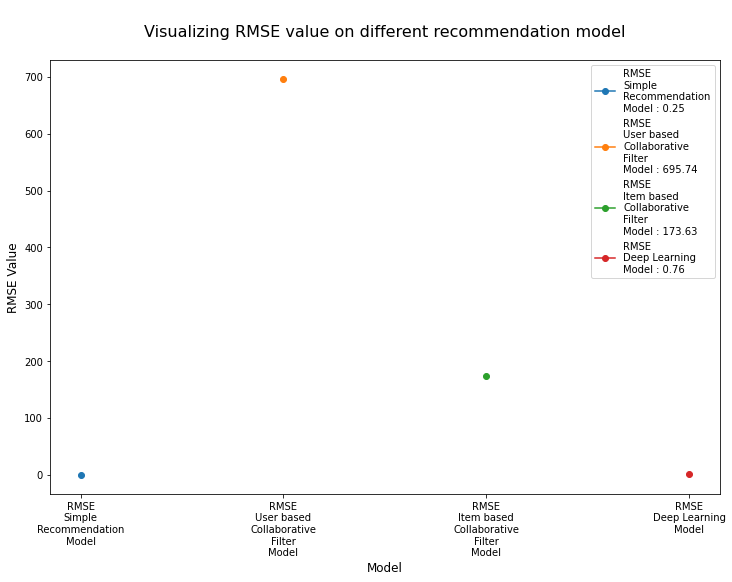

In [91]:
plt.figure(figsize=(12,8))
rmse_list = [rmse_SR, rmse_ub_cf, rmse_ib_cf, rmse_DL]
rmse_name = ["RMSE\nSimple\nRecommendation\nModel", "RMSE\nUser based\nCollaborative\nFilter\nModel", "RMSE\nItem based\nCollaborative\nFilter\nModel", "RMSE\nDeep Learning\nModel"]
for i in range(len(rmse_list)):
    plt.plot(rmse_name[i], rmse_list[i], marker="o",label="{} : {:.2f}".format(rmse_name[i], rmse_list[i]))

plt.legend()
plt.title("\nVisualizing RMSE value on different recommendation model\n", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("RMSE Value", fontsize=12)
plt.show()